## EDA Jura dataset (Goovartes, 1997)

In [ ]:
%pip install geopandas
import geopandas as gpd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt



# Import data

In [15]:
# Provided dataset
    # Xloc and Yloc are the coordinates of the data points and Z is the variable of interest
    # The (calibration) dataset contains 259 data points located in the Jura region in France
    # The variable of interest is the concentration of a specific mineral in the soil -- unit  ppm (parts per million)

# Read the shapefile
basin = gpd.read_file(r'data/jura_basin.shp')
geology = gpd.read_file(r'data/jura.shp')


dataframe = pd.read_csv(r'data/jura_sample.csv')
dataframe.head() # Display the first 5 rows of the data


,n,set,Xloc,Yloc,Landuse,Rock,Rock_name,Cd,Co,Cr,Cu,Ni,Pb,Zn,Cd_log2,Cd_log10,Cd_ln,Pb_log2,Pb_log10,Pb_ln
0,1,cal,2.386,3.077,3,3,Sequanian,1.740,9.32,38.32,25.72,21.32,77.36,92.56,0.799087,0.240549,0.553885,6.273516,1.888516,4.348470
1,2,cal,2.544,1.972,2,2,Kimmeridgian,1.335,10.00,40.20,24.76,29.72,77.88,73.56,0.416840,0.125481,0.288931,6.283181,1.891426,4.355169
2,3,cal,2.807,3.347,2,3,Sequanian,1.610,10.60,47.00,8.88,21.40,30.80,64.80,0.687061,0.206826,0.476234,4.944858,1.488551,3.427515
3,4,cal,4.308,1.933,3,2,Kimmeridgian,2.150,11.92,43.52,22.70,29.72,56.40,90.00,1.104337,0.332438,0.765468,5.817623,1.751279,4.032469
4,5,cal,4.383,1.081,3,5,Quaternary,1.565,16.32,38.52,34.32,26.20,66.40,88.40,0.646163,0.194514,0.447886,6.053111,1.822168,4.195697


In [16]:
#create a dataset with Xloc, Yloc and Pb_log10
data = dataframe[['Xloc', 'Yloc', 'Pb', 'Pb_log10']]
#data.rename(columns={'Pb': 'Z'}, inplace=True) #rename 'Pb_log10' to Z

""" data = dataframe[['Xloc', 'Yloc', 'Pb_log10']]
data.rename(columns={'Pb_log10': 'Z'}, inplace=True) #rename 'Pb_log10' to Z """

data.head() # Display the first 5 rows of the data

,Xloc,Yloc,Pb,Pb_log10
0,2.386,3.077,77.36,1.888516
1,2.544,1.972,77.88,1.891426
2,2.807,3.347,30.80,1.488551
3,4.308,1.933,56.40,1.751279
4,4.383,1.081,66.40,1.822168


# Exploratory data analysis (EDA) Pb

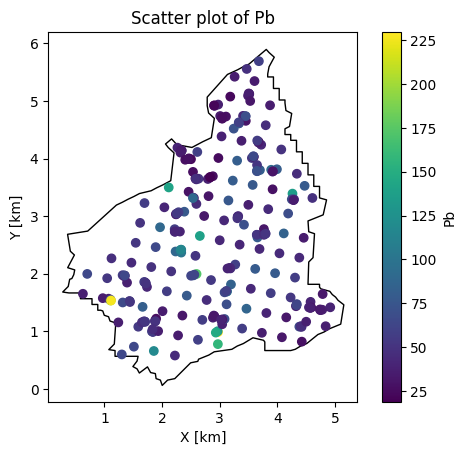

count    259.000000
mean      53.916602
std       29.792158
min       18.960000
25%       36.520000
50%       46.400000
75%       60.400000
max      229.560000
Name: Pb, dtype: float64


In [17]:
#Scatter plot
fig, ax = plt.subplots()
basin.plot(ax=ax, color='white', edgecolor='black')
plt.scatter(data['Xloc'], data['Yloc'], c=data['Pb'], cmap='viridis')
plt.title('Scatter plot of Pb')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.colorbar(label='Pb')
plt.show()

#Summary statistics f Z
print(data['Pb'].describe())

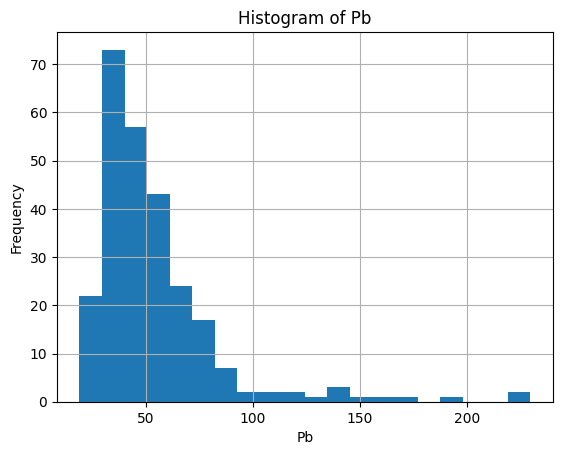

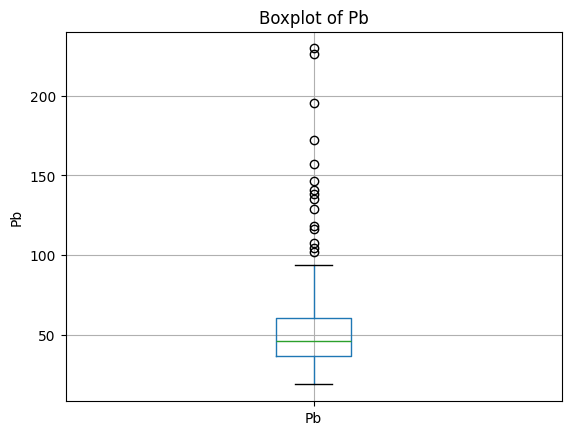

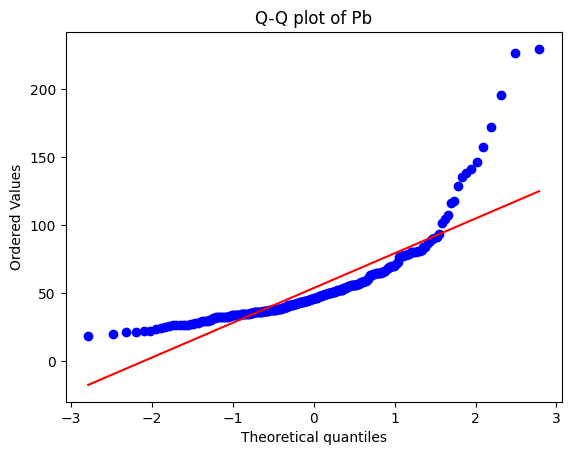

Kolmogorov-Smirnov test statistic: 1.0
Kolmogorov-Smirnov test p-value: 0.0


" #Shapiro-Wilk test\nshapiro_test = stats.shapiro(data['Z'])\nprint('Shapiro-Wilk test statistic:', shapiro_test[0])\nprint('Shapiro-Wilk test p-value:', shapiro_test[1])\n#A: If the p-value is less than 0.05, so we reject the null hypothesis that the data is normally distributed\n#Therefore the data is not normally distributed \n#B: If the p-value is greater than 0.05, so we fail to reject the null hypothesis that the data is normally distributed\n#Therefore the data is normally distributed"

In [18]:
#Histogram
data['Pb'].hist(bins=20)
plt.title('Histogram of Pb')
plt.xlabel('Pb')
plt.ylabel('Frequency')
plt.show()

#Boxplot
data.boxplot(column='Pb')
plt.title('Boxplot of Pb')
plt.ylabel('Pb')
plt.show()

#QQ plot
    # A QQ plot is a scatterplot created by plotting two sets of quantiles against one another.
    # If both sets of quantiles came from the same distribution, we should see the points forming
    # a line that's roughly straight
stats.probplot(data['Pb'], dist="norm", plot=plt)
plt.title('Q-Q plot of Pb')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.show()



#Kolmogorov-Smirnov test
ks_test = stats.kstest(data['Pb'], 'norm')
print('Kolmogorov-Smirnov test statistic:', ks_test.statistic)
print('Kolmogorov-Smirnov test p-value:', ks_test.pvalue)


""" #Shapiro-Wilk test
shapiro_test = stats.shapiro(data['Z'])
print('Shapiro-Wilk test statistic:', shapiro_test[0])
print('Shapiro-Wilk test p-value:', shapiro_test[1])
#A: If the p-value is less than 0.05, so we reject the null hypothesis that the data is normally distributed
#Therefore the data is not normally distributed 
#B: If the p-value is greater than 0.05, so we fail to reject the null hypothesis that the data is normally distributed
#Therefore the data is normally distributed"""

# Exploratory data analysis (EDA) log10(Pb)

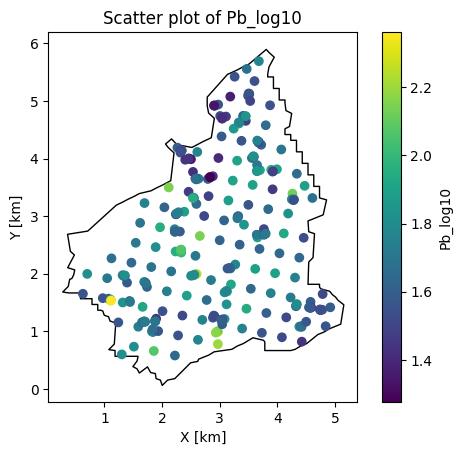

             Xloc        Yloc          Pb    Pb_log10
count  259.000000  259.000000  259.000000  259.000000
mean     2.979772    2.665062   53.916602    1.687321
std      0.974985    1.295259   29.792158    0.184239
min      0.626000    0.580000   18.960000    1.277838
25%      2.282000    1.487000   36.520000    1.562531
50%      3.043000    2.581000   46.400000    1.666518
75%      3.665000    3.752000   60.400000    1.781027
max      4.920000    5.690000  229.560000    2.360896


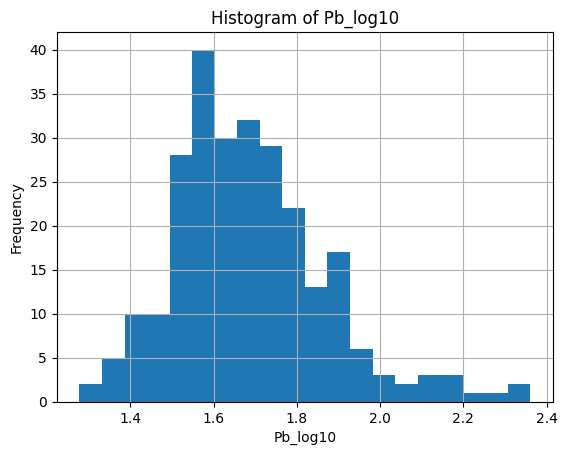

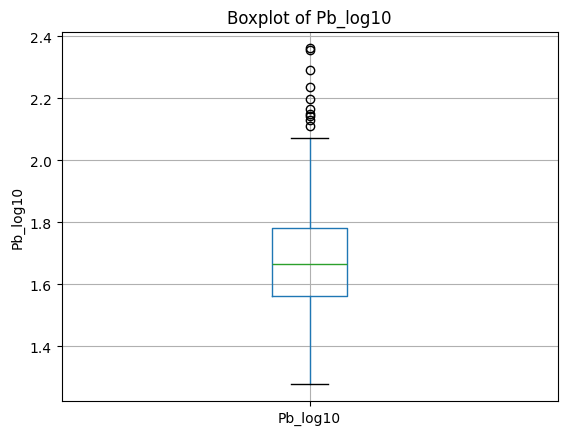

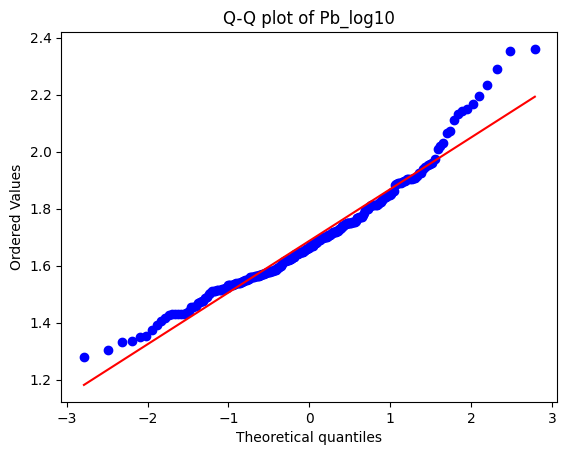

Kolmogorov-Smirnov test statistic: 0.900853529662798
Kolmogorov-Smirnov test p-value: 2.3584332326765295e-260


In [19]:
#transform the data to normality
#Scatter plot
fig, ax = plt.subplots()
basin.plot(ax=ax, color='white', edgecolor='black')
plt.scatter(data['Xloc'], data['Yloc'], c=data['Pb_log10'], cmap='viridis')
plt.title('Scatter plot of Pb_log10')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.colorbar(label='Pb_log10')
plt.show()

#Summary statistics
print(data.describe())

#Histogram
data['Pb_log10'].hist(bins=20)
plt.title('Histogram of Pb_log10')
plt.xlabel('Pb_log10')
plt.ylabel('Frequency')
plt.show()

#Boxplot
data.boxplot(column='Pb_log10')
plt.title('Boxplot of Pb_log10')
plt.ylabel('Pb_log10')
plt.show()

#QQ plot
stats.probplot(data['Pb_log10'], dist="norm", plot=plt)
plt.title('Q-Q plot of Pb_log10')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.show()

#Kolmogorov-Smirnov test
ks_test = stats.kstest(data['Pb_log10'], 'norm')
print('Kolmogorov-Smirnov test statistic:', ks_test.statistic)
print('Kolmogorov-Smirnov test p-value:', ks_test.pvalue)




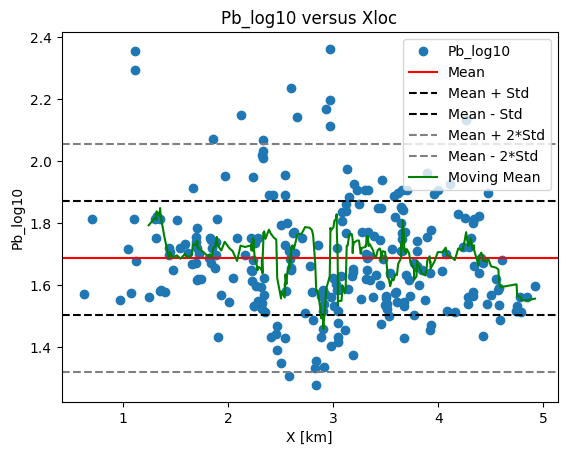

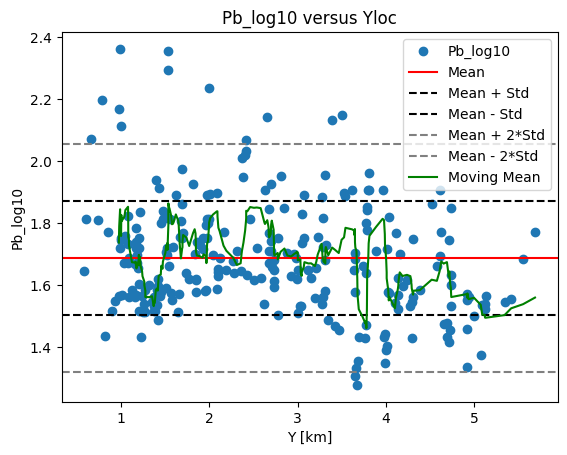

In [20]:
#Spatial structure

#sort the data by Xloc and calculate moving average of Pb_log10 over Xloc
data = data.sort_values(by='Xloc')

plt.plot(data['Xloc'], data['Pb_log10'], 'o', label='Pb_log10')
plt.axhline(y=data['Pb_log10'].mean(), color='r', linestyle='-', label='Mean')
plt.axhline(y=data['Pb_log10'].mean() + data['Pb_log10'].std(), color='k', linestyle='--', label='Mean + Std')
plt.axhline(y=data['Pb_log10'].mean() - data['Pb_log10'].std(), color='k', linestyle='--', label='Mean - Std')
plt.axhline(y=data['Pb_log10'].mean() + 2*data['Pb_log10'].std(), color='grey', linestyle='--', label='Mean + 2*Std')
plt.axhline(y=data['Pb_log10'].mean() - 2*data['Pb_log10'].std(), color='grey', linestyle='--', label='Mean - 2*Std')
plt.plot(data['Xloc'], data['Pb_log10'].rolling(window=10).mean(), label='Moving Mean', color='g')
plt.title('Pb_log10 versus Xloc')
plt.xlabel('X [km]')
plt.ylabel('Pb_log10')
plt.legend()
plt.show()


#sort the data by Yloc and calculate moving average of Pb_log10 over Yloc
data = data.sort_values(by='Yloc')
plt.plot(data['Yloc'], data['Pb_log10'], 'o', label='Pb_log10')
plt.axhline(y=data['Pb_log10'].mean(), color='r', linestyle='-', label='Mean')
plt.axhline(y=data['Pb_log10'].mean() + data['Pb_log10'].std(), color='k', linestyle='--', label='Mean + Std')
plt.axhline(y=data['Pb_log10'].mean() - data['Pb_log10'].std(), color='k', linestyle='--', label='Mean - Std')
plt.axhline(y=data['Pb_log10'].mean() + 2*data['Pb_log10'].std(), color='grey', linestyle='--', label='Mean + 2*Std')
plt.axhline(y=data['Pb_log10'].mean() - 2*data['Pb_log10'].std(), color='grey', linestyle='--', label='Mean - 2*Std')
plt.plot(data['Yloc'], data['Pb_log10'].rolling(window=10).mean(), label='Moving Mean', color='g')
plt.title('Pb_log10 versus Yloc')
plt.xlabel('Y [km]')
plt.ylabel('Pb_log10')
plt.legend()
plt.show()


   OBJECTID      DATE  ID   ROCK  \
0        31  20010101  32  basin   

                                            geometry  
0  POLYGON ((3.82507 5.4751, 3.82507 5.42511, 3.9...  


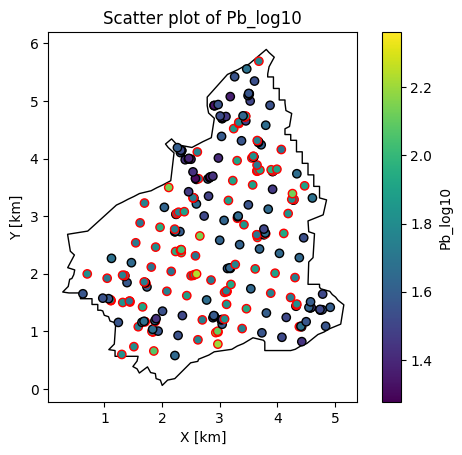

In [ ]:
#Spatial structure
#Scatter plot of Pb_log10 over Xloc and Yloc


fig, ax = plt.subplots()
basin.plot(ax=ax, color='white', edgecolor='black')
plt.scatter(data['Xloc'], data['Yloc'], c=data['Pb_log10'], cmap='viridis', edgecolors=['red' if pb > data['Pb_log10'].mean() else 'black' for pb in data['Pb_log10']])
plt.title('Scatter plot of Pb_log10')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.colorbar(label='Pb_log10')


# Display the shapefile
print(basin)
plt.show()


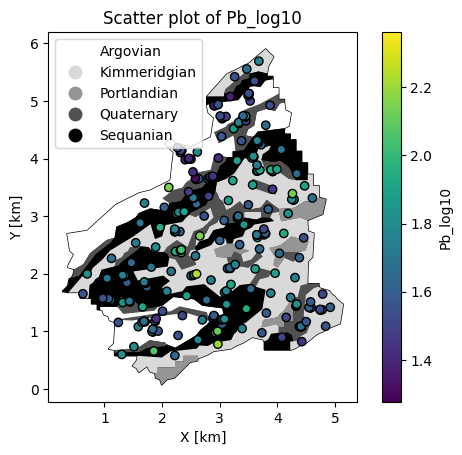

In [22]:
#Scatter plot of Pb_log10 and the jura.shp file
fig, ax = plt.subplots()
geology.plot(ax=ax, color='white', edgecolor='black')
#fill the polygons with grey colors of the ROCK type
geology.plot(ax=ax, column='ROCK', legend=True, cmap='Greys')
plt.scatter(data['Xloc'], data['Yloc'], c=data['Pb_log10'], cmap='viridis', edgecolors='black')
plt.title('Scatter plot of Pb_log10')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.colorbar(label='Pb_log10')
plt.show()



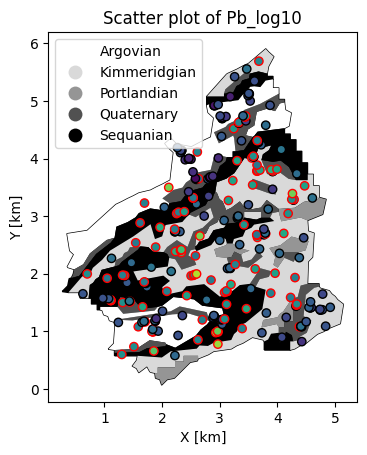

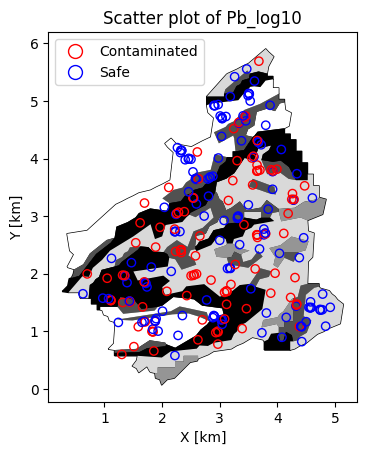

In [23]:
#Scatter plot of Pb_log10 and the jura.shp file with the Pb_log10 values above the thres_Pb in red
thres_Pb = 1.699
fig, ax = plt.subplots()
geology.plot(ax=ax, color='white', edgecolor='black')
#fill the polygons with grey colors of the ROCK type
geology.plot(ax=ax, column='ROCK', legend=True, cmap='Greys')
plt.scatter(data['Xloc'], data['Yloc'], c=data['Pb_log10'], cmap='viridis', edgecolors=['red' if pb > thres_Pb else 'black' for pb in data['Pb_log10']])
plt.title('Scatter plot of Pb_log10')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.show()

#if above the thres_Pb, the points are in red, otherwise in black, no fill of Pb_log10
thres_Pb = 1.699
fig, ax = plt.subplots()

geology.plot(ax=ax, color='white', edgecolor='black')
#fill the polygons with grey colors of the ROCK type    
geology.plot(ax=ax, column='ROCK', legend=True, cmap='Greys')
plt.scatter(data['Xloc'], data['Yloc'], c='none', edgecolors=['red' if pb > thres_Pb else 'blue' for pb in data['Pb_log10']], linewidths=1)

#include legend for red and blue points
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='none', markeredgecolor='red', markersize=10, label='Contaminated')
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='none', markeredgecolor='blue', markersize=10, label='Safe')
plt.legend(handles=[red_patch, blue_patch], loc='upper left')
plt.title('Scatter plot of Pb_log10')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.show()
